# InferSent model testing before applying to the project!

In [1]:
# import stuff
%load_ext autoreload
%autoreload 2
%matplotlib inline

from random import randint

import numpy as np
import torch
import os

## Load model

In [2]:
os.path.abspath(".")

'/home/animesh/Programming/DL_ML_research/AAMST2I/InferSent/encoder'

In [3]:
from models import InferSent
MODEL_PATH =  '../models/infersent2.pkl'
params_model = {'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                'pool_type': 'max', 'dpout_model': 0.0, 'version': 2}
model = InferSent(params_model)
model.load_state_dict(torch.load(MODEL_PATH))

In [5]:
W2V_PATH = '../models/glove.840B.300d.txt'
model.set_w2v_path(W2V_PATH)

In [7]:
model.build_vocab_k_words(K=100000)

Vocab size : 100000


## Encode sentences

In [8]:
# gpu mode : ~1000 sentences/s
# cpu mode : ~75 sentences/s

In [20]:
embedding, sentence_encodings, final_state = model.encode(['Animesh is a very good person', 'He is very intelligent'], tokenize=False)

In [44]:
embedding.shape, sentence_encodings.shape, final_state.shape

((2, 4096), (8, 2, 4096), (2, 4096))

## Visualization

In [45]:
np.linalg.norm(model.encode(['the cat eats.'])[-1])

11.163946

In [46]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [86]:
embed_1 = model.encode(['abba dabba'], tokenize=False)[-1]

In [58]:
embed_2 = model.encode(['Woman on skies looking at artwork for sale in the snow'], tokenize=False)[-1]

In [59]:
cosine(embed_1[0], embed_2[0])

0.7954274

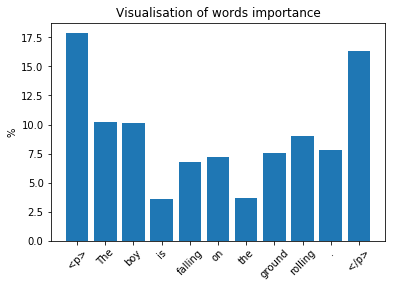

In [78]:
_, _ = model.visualize("The boy is falling on the ground rolling .")

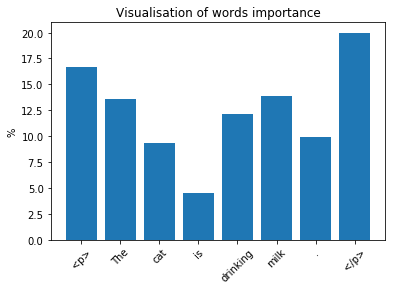

In [79]:
my_sent = 'The cat is drinking milk.'
_, _ = model.visualize(my_sent)

Vocab size : 500000


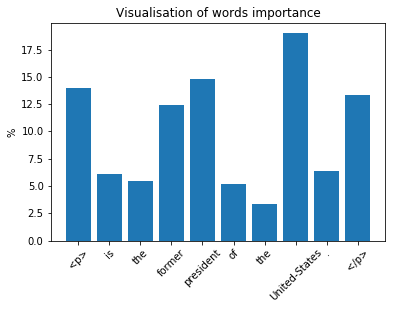

In [81]:
model.build_vocab_k_words(500000) # getting 500K words vocab
my_sent = 'Thaliva is the former president of the United-States.'
_, _ = model.visualize(my_sent)

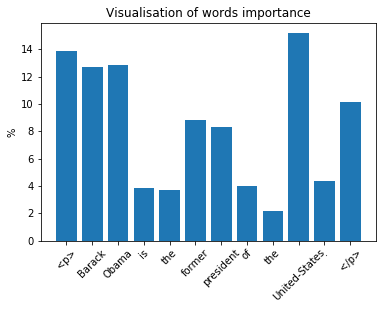

In [83]:
_, _ = model.visualize('Barack Obama is the former president of the United-States.')

### Conclusion: I have seen enough to believe that this model will encode text nicely and work properly for conditioning the image generation